In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
#extracting dataset
df=pd.read_csv('LifeExpectancyData.csv')

In [3]:
df.head()

,Country,Year,Status,lifeexpect,AdultMortality,infantdeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness(1-19 years),thinness(5-9 years),IncomecCmposition-of- resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.describe()

,Year,lifeexpect,AdultMortality,infantdeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,BMI,under-five deaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness(1-19 years),thinness(5-9 years),IncomecCmposition-of- resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
lifeexpect                          10
AdultMortality                      10
infantdeaths                         0
Alcohol                            194
percentageExpenditure                0
HepatitisB                         553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Totalexpenditure                   226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness(1-19 years)                34
thinness(5-9 years)                 34
IncomecCmposition-of- resources    167
Schooling                          163
dtype: int64

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

In [7]:
#https://elearning.dbs.ie/pluginfile.php/1540609/mod_resource/content/1/CarResale.html
#to binarize the entries of column "status"

df['Status'] = df['Status'].map({'Developed':1,'Developing':0})

In [8]:
#https://www.geeksforgeeks.org/replacing-missing-values-using-pandas-in-python/
#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].median())
df['HepatitisB'] = df['HepatitisB'].fillna(df['HepatitisB'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['Population'] = df['Population'].fillna(df['Population'].median())
df['Polio'] = df['Polio'].fillna(df['Polio'].median())
df['Totalexpenditure'] = df['Totalexpenditure'].fillna(df['Totalexpenditure'].median())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].median())
df['thinness(1-19 years)'] = df['thinness(1-19 years)'].fillna(df['thinness(1-19 years)'].median())
df['thinness(5-9 years)'] = df['thinness(5-9 years)'].fillna(df['thinness(5-9 years)'].median())
df['HIV/AIDS'] = df['HIV/AIDS'].fillna(df['HIV/AIDS'].median())
df['lifeexpect'] = df['lifeexpect'].fillna(df['lifeexpect'].median())
df['AdultMortality'] = df['AdultMortality'].fillna(df['AdultMortality'].median())
df['Diphtheria'] = df['Diphtheria'].fillna(df['Diphtheria'].median())
df['IncomecCmposition-of- resources'] = df['IncomecCmposition-of- resources'].fillna(df['IncomecCmposition-of- resources'].median())


In [9]:
#check again if there is any null value
df.isnull().sum()

Country                            0
Year                               0
Status                             0
lifeexpect                         0
AdultMortality                     0
infantdeaths                       0
Alcohol                            0
percentageExpenditure              0
HepatitisB                         0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Totalexpenditure                   0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness(1-19 years)               0
thinness(5-9 years)                0
IncomecCmposition-of- resources    0
Schooling                          0
dtype: int64

In [10]:
print(df.info())
print(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   lifeexpect                       2938 non-null   float64
 4   AdultMortality                   2938 non-null   float64
 5   infantdeaths                     2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentageExpenditure            2938 non-null   float64
 8   HepatitisB                       2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [11]:
#https://elearning.dbs.ie/pluginfile.php/1540609/mod_resource/content/1/CarResale.html (class lectures)
corrs = df.corr()
corrs

,Year,Status,lifeexpect,AdultMortality,infantdeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness(1-19 years),thinness(5-9 years),IncomecCmposition-of- resources,Schooling
Year,1.000000,-0.001864,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,...,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Status,-0.001864,1.000000,0.481415,-0.314894,-0.112252,0.579662,0.454261,0.127008,-0.076955,0.309371,...,0.218628,0.290431,0.215281,-0.148590,0.445981,-0.037606,-0.365814,-0.364179,0.460677,0.492984
lifeexpect,0.170819,0.481415,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,...,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
AdultMortality,-0.079535,-0.314894,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,...,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infantdeaths,-0.037415,-0.112252,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,...,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.069147,0.579662,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,...,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentageExpenditure,0.031400,0.454261,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,...,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
HepatitisB,0.021302,0.127008,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,...,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.082493,-0.076955,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,...,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
BMI,0.108484,0.309371,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,...,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806


<AxesSubplot:>

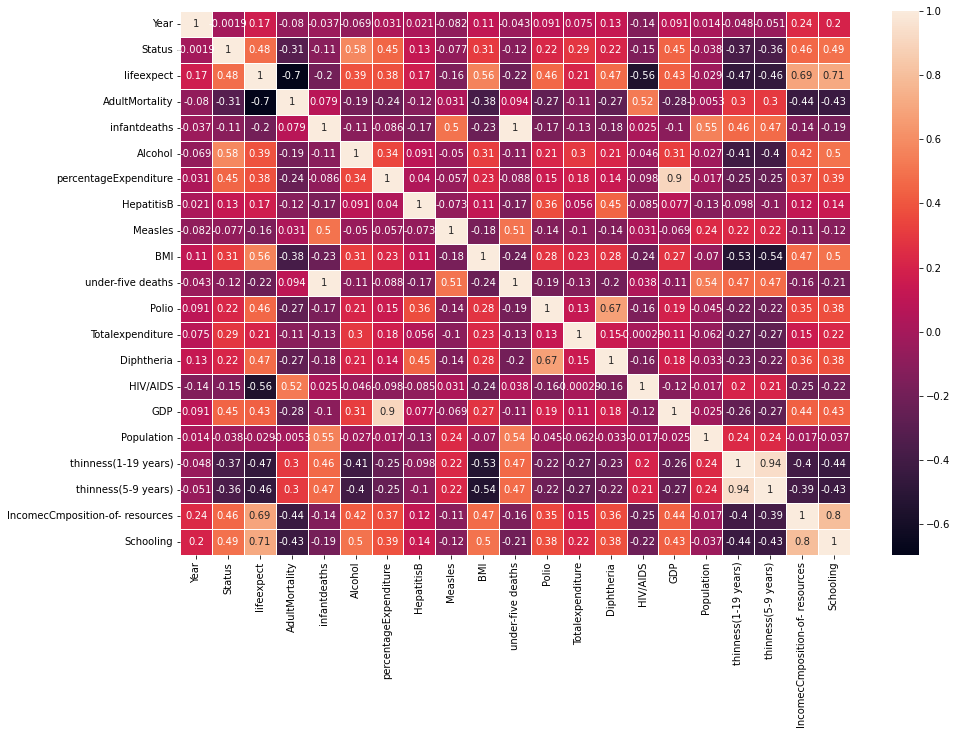

In [12]:
#https://elearning.dbs.ie/pluginfile.php/1540609/mod_resource/content/1/CarResale.html (class lectures)
plt.subplots(figsize=(15,10))
map_correlation=sns.heatmap(corrs, annot=True, linewidth=1)#, cmap='coolwarm')
map_correlation

In [13]:
##lifeexpect is correlated to Schooling,IncomecComposition-of-resources,GDP,Diphteria,Totalexpenditure, Polio,BMI, HepatitisB,percentageexpenditure, Alcohol,Status and Year

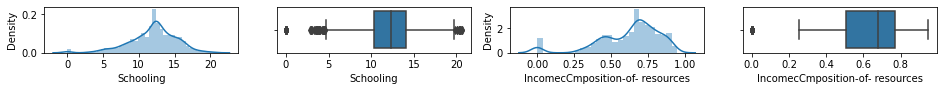

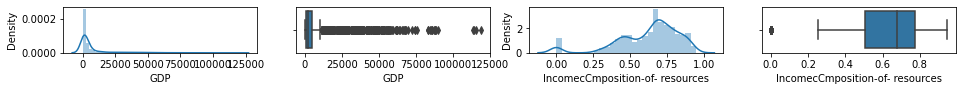

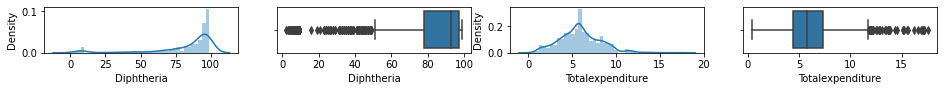

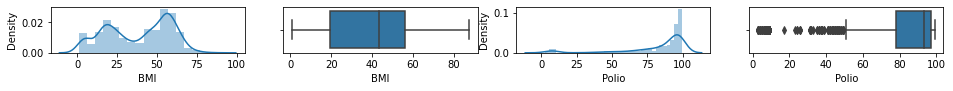

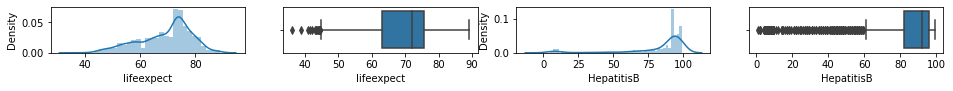

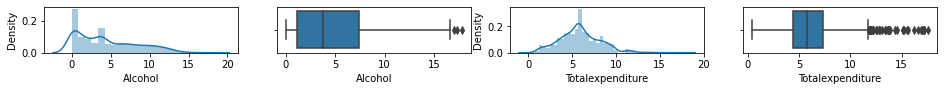

In [12]:
# to check from the distplots and boxplots, the presence of outliers
#https://www.kaggle.com/asimislam/tutorial-python-subplots
# https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(16,8))
plt.subplot(8,4,1)
sns.distplot(df['Schooling'])
plt.subplot(8,4,2)
sns.boxplot(df['Schooling'])
plt.subplot(8,4,3)
sns.distplot(df['IncomecCmposition-of- resources'])
plt.subplot(8,4,4)
sns.boxplot(df['IncomecCmposition-of- resources'])
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(8,4,5)
sns.distplot(df['GDP'])
plt.subplot(8,4,6)
sns.boxplot(df['GDP'])
plt.subplot(8,4,7)
sns.distplot(df['IncomecCmposition-of- resources'])
plt.subplot(8,4,8)
sns.boxplot(df['IncomecCmposition-of- resources'])
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(8,4,9)
sns.distplot(df['Diphtheria'])
plt.subplot(8,4,10)
sns.boxplot(df['Diphtheria'])
plt.subplot(8,4,11)
sns.distplot(df['Totalexpenditure'])
plt.subplot(8,4,12)
sns.boxplot(df['Totalexpenditure'])
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(8,4,13)
sns.distplot(df['BMI'])
plt.subplot(8,4,14)
sns.boxplot(df['BMI'])
plt.subplot(8,4,15)
sns.distplot(df['Polio'])
plt.subplot(8,4,16)
sns.boxplot(df['Polio'])
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(8,4,17)
sns.distplot(df['lifeexpect'])
plt.subplot(8,4,18)
sns.boxplot(df['lifeexpect'])
plt.subplot(8,4,19)
sns.distplot(df['HepatitisB'])
plt.subplot(8,4,20)
sns.boxplot(df['HepatitisB'])
plt.show()
plt.figure(figsize=(16,8))
plt.subplot(8,4,21)
sns.distplot(df['Alcohol'])
plt.subplot(8,4,22)
sns.boxplot(df['Alcohol'])
plt.subplot(8,4,23)
sns.distplot(df['Totalexpenditure'])
plt.subplot(8,4,24)
sns.boxplot(df['Totalexpenditure'])
plt.show()

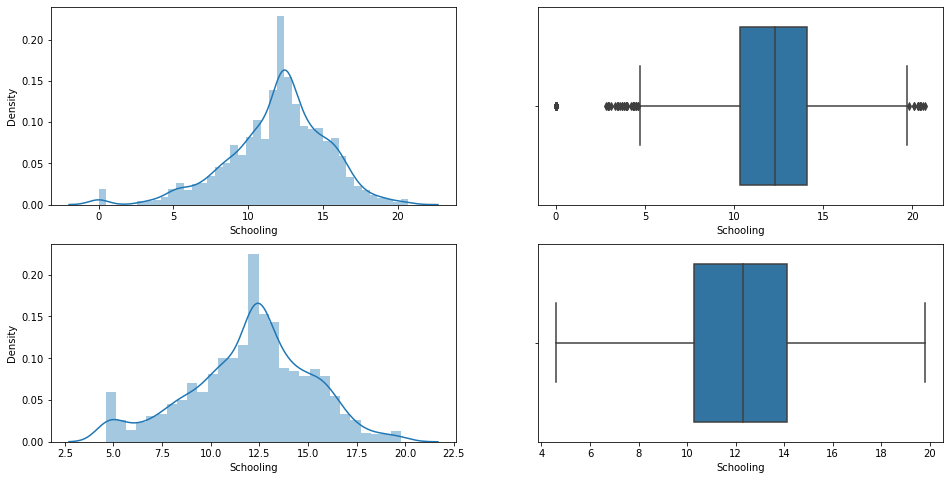

In [25]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
#Schooling
percentile25_Schooling = df['Schooling'].quantile(0.25)
percentile75_Schooling = df['Schooling'].quantile(0.75)
iqr_Schooling=percentile75_Schooling-percentile25_Schooling
upper_limit_Schooling = percentile75_Schooling + 1.5 * iqr_Schooling
lower_limit_Schooling = percentile25_Schooling - 1.5 * iqr_Schooling
df[df['Schooling'] > upper_limit_Schooling]  #Find outliers
df[df['Schooling'] < lower_limit_Schooling]
#Trimming
new_df_Schooling = df[df['Schooling'] < upper_limit_Schooling]
new_df_Schooling.shape

#Capping
new_df_cap_Schooling = df.copy()
new_df_cap_Schooling['Schooling'] = np.where(
    new_df_cap_Schooling['Schooling'] > upper_limit_Schooling,
    upper_limit_Schooling,
    np.where(
        new_df_cap_Schooling['Schooling'] < lower_limit_Schooling,
        lower_limit_Schooling,
        new_df_cap_Schooling['Schooling']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Schooling'])
plt.subplot(2,2,2)
sns.boxplot(df['Schooling'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_Schooling['Schooling'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_Schooling['Schooling'])
plt.show()



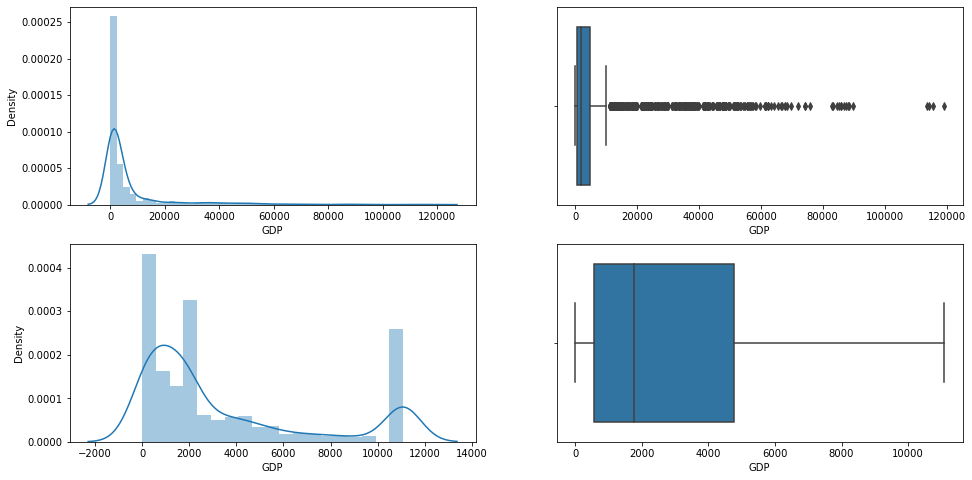

In [13]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
#'GDP'
percentile25_GDP = df['GDP'].quantile(0.25)
percentile75_GDP = df['GDP'].quantile(0.75)
iqr_GDP=percentile75_GDP-percentile25_GDP
upper_limit_GDP = percentile75_GDP + 1.5 * iqr_GDP
lower_limit_GDP = percentile25_GDP - 1.5 * iqr_GDP
df[df['GDP'] > upper_limit_GDP]  #Find outliers
df[df['GDP'] < lower_limit_GDP]
#Trimming
new_df_GDP = df[df['GDP'] < upper_limit_GDP]
new_df_GDP.shape


#Capping
new_df_cap_GDP = df.copy()
new_df_cap_GDP['GDP'] = np.where(
    new_df_cap_GDP['GDP'] > upper_limit_GDP,
    upper_limit_GDP,
    np.where(
        new_df_cap_GDP['GDP'] < lower_limit_GDP,
        lower_limit_GDP,
        new_df_cap_GDP['GDP']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['GDP'])
plt.subplot(2,2,2)
sns.boxplot(df['GDP'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_GDP['GDP'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_GDP['GDP'])
plt.show()


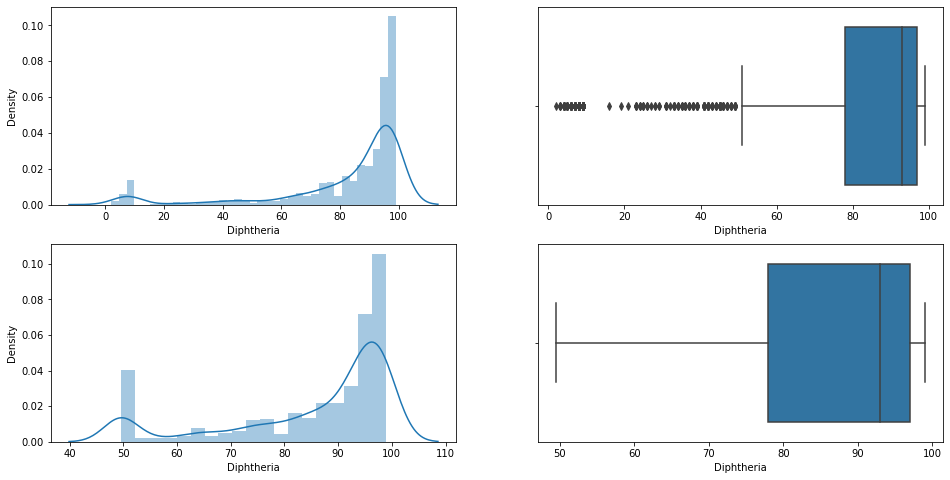

In [33]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

#'Diphteria'
percentile25_Dip = df['Diphtheria'].quantile(0.25)
percentile75_Dip = df['Diphtheria'].quantile(0.75)
iqr_Dip=percentile75_Dip-percentile25_Dip
upper_limit_Dip = percentile75_Dip + 1.5 * iqr_Dip
lower_limit_Dip = percentile25_Dip - 1.5 * iqr_Dip
df[df['Diphtheria'] > upper_limit_Dip] #Find outliers
df[df['Diphtheria'] < lower_limit_Dip]

#Trimming
new_df_Dip = df[df['Diphtheria'] < upper_limit_Dip]
new_df_Dip.shape

#Capping
new_df_cap_Dip = df.copy()
new_df_cap_Dip['Diphtheria'] = np.where(
    new_df_cap_Dip['Diphtheria'] > upper_limit_Dip,
    upper_limit_Dip,
    np.where(
        new_df_cap_Dip['Diphtheria'] < lower_limit_Dip,
        lower_limit_Dip,
        new_df_cap_Dip['Diphtheria']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Diphtheria'])
plt.subplot(2,2,2)
sns.boxplot(df['Diphtheria'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_Dip['Diphtheria'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_Dip['Diphtheria'])
plt.show()


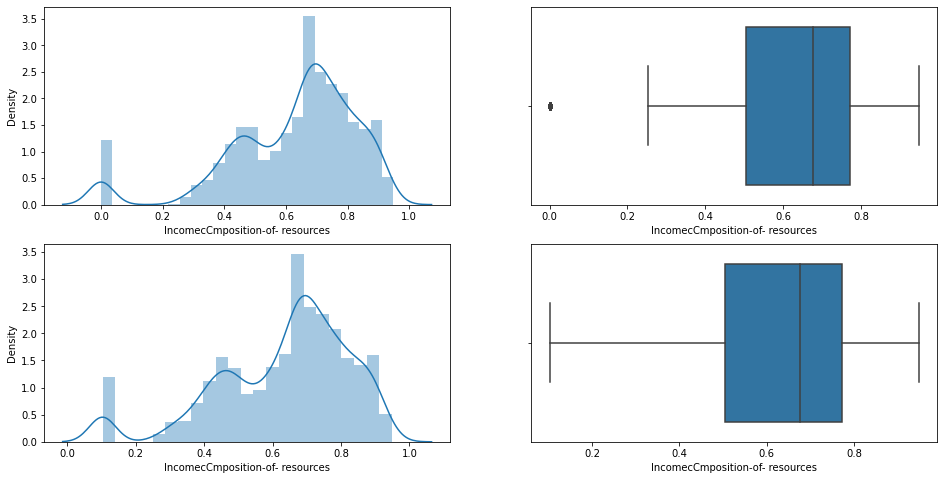

In [14]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

#IncomecComposition-of-resources
percentile25_Income = df['IncomecCmposition-of- resources'].quantile(0.25)
percentile75_Income = df['IncomecCmposition-of- resources'].quantile(0.75)
iqr_Income=percentile75_Income-percentile25_Income
upper_limit_Income = percentile75_Income + 1.5 * iqr_Income
lower_limit_Income= percentile25_Income - 1.5 * iqr_Income
df[df['IncomecCmposition-of- resources'] > upper_limit_Income] #Find outliers
df[df['IncomecCmposition-of- resources'] < lower_limit_Income]
#Trimming
new_df_Income = df[df['IncomecCmposition-of- resources'] < upper_limit_Income]
new_df_Income.shape

#Capping
new_df_cap_Income = df.copy()
new_df_cap_Income['IncomecCmposition-of- resources'] = np.where(
    new_df_cap_Income['IncomecCmposition-of- resources'] > upper_limit_Income,
    upper_limit_Income,
    np.where(
        new_df_cap_Income['IncomecCmposition-of- resources'] < lower_limit_Income,
        lower_limit_Income,
        new_df_cap_Income['IncomecCmposition-of- resources']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['IncomecCmposition-of- resources'])
plt.subplot(2,2,2)
sns.boxplot(df['IncomecCmposition-of- resources'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_Income['IncomecCmposition-of- resources'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_Income['IncomecCmposition-of- resources'])
plt.show()


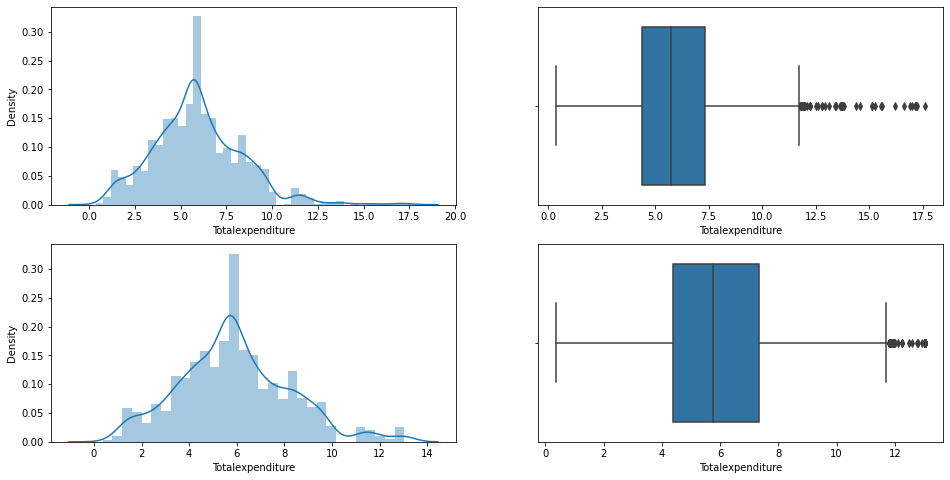

In [31]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

#'Totalexpenditure'
percentile25_Totalexpenditure = df['Totalexpenditure'].quantile(0.25)
percentile75_Totalexpenditure = df['Totalexpenditure'].quantile(0.75)
iqr_Totalexpenditure=percentile75_Schooling-percentile25_Schooling
upper_limit_Totalexpenditure = percentile75_Totalexpenditure+ 1.5 * iqr_Totalexpenditure
lower_limit_Totalexpenditure = percentile25_Totalexpenditure- 1.5 * iqr_Totalexpenditure
df[df['Totalexpenditure'] > upper_limit_Totalexpenditure]#Find outliers
df[df['Totalexpenditure'] < lower_limit_Totalexpenditure]

#Trimming
new_df_Totalexp = df[df['Totalexpenditure'] < upper_limit_Totalexpenditure]
new_df_Totalexp.shape

#Capping
new_df_cap_Expenditure= df.copy()
new_df_cap_Expenditure['Totalexpenditure'] = np.where(
    new_df_cap_Expenditure['Totalexpenditure'] > upper_limit_Totalexpenditure,
   upper_limit_Totalexpenditure,
    np.where(
        new_df_cap_Expenditure['Totalexpenditure'] < lower_limit_Totalexpenditure,
       lower_limit_Totalexpenditure,
        new_df_cap_Expenditure['Totalexpenditure']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Totalexpenditure'])
plt.subplot(2,2,2)
sns.boxplot(df['Totalexpenditure'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_Expenditure['Totalexpenditure'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_Expenditure['Totalexpenditure'])
plt.show()

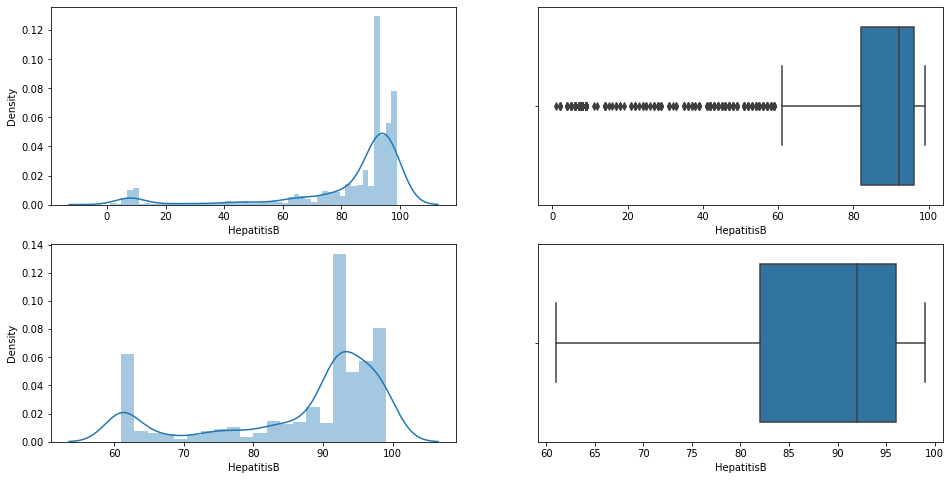

In [15]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

#'HepatitisB'
percentile25_HepatitisB  = df['HepatitisB'].quantile(0.25)
percentile75_HepatitisB  = df['HepatitisB'].quantile(0.75)
iqr_HepatitisB =percentile75_HepatitisB -percentile25_HepatitisB 
upper_limit_HepatitisB  = percentile75_HepatitisB  + 1.5 * iqr_HepatitisB 
lower_limit_HepatitisB  = percentile25_HepatitisB  - 1.5 * iqr_HepatitisB 
df[df['HepatitisB'] > upper_limit_HepatitisB ]
df[df['HepatitisB'] < lower_limit_HepatitisB ]

#Trimming
new_df_Hepatitis= df[df['HepatitisB'] < upper_limit_HepatitisB]
new_df_Hepatitis.shape

#Capping
new_df_cap_Hepatitis= df.copy()
new_df_cap_Hepatitis['HepatitisB'] = np.where(
    new_df_cap_Hepatitis['HepatitisB'] >upper_limit_HepatitisB,
   upper_limit_HepatitisB,
    np.where(
        new_df_cap_Hepatitis['HepatitisB'] < lower_limit_HepatitisB,
       lower_limit_HepatitisB,
        new_df_cap_Hepatitis['HepatitisB']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['HepatitisB'])
plt.subplot(2,2,2)
sns.boxplot(df['HepatitisB'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_Hepatitis['HepatitisB'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_Hepatitis['HepatitisB'])
plt.show()

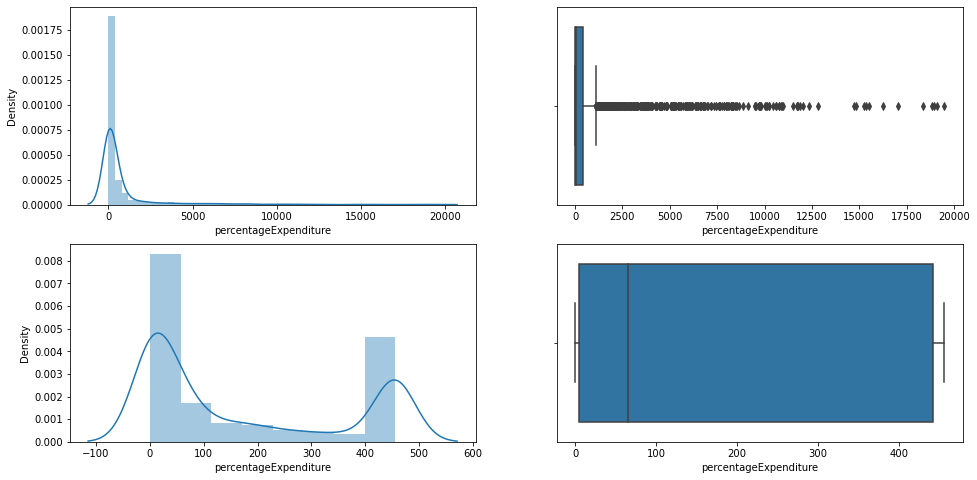

In [29]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

#'percentageexpenditure'
percentile25_percentageExpenditure= df['percentageExpenditure'].quantile(0.25)
percentile75_percentageExpenditure = df['percentageExpenditure'].quantile(0.75)
iqr_percentageExpenditure=percentile75_Schooling-percentile25_percentageExpenditure
upper_limit_percentageExpenditure = percentile75_percentageExpenditure + 1.5 * iqr_percentageExpenditure
lower_limit_percentageExpenditure = percentile25_percentageExpenditure - 1.5 * iqr_percentageExpenditure
df[df['percentageExpenditure'] > upper_limit_percentageExpenditure]
df[df['percentageExpenditure'] < lower_limit_percentageExpenditure]

#Trimming
new_df_percentageExpenditure= df[df['percentageExpenditure'] < upper_limit_percentageExpenditure]
new_df_percentageExpenditure.shape

#Capping
new_df_cap_percentageExpenditure= df.copy()
new_df_cap_percentageExpenditure['percentageExpenditure'] = np.where(
    new_df_cap_percentageExpenditure['percentageExpenditure'] >upper_limit_percentageExpenditure,
   upper_limit_percentageExpenditure,
    np.where(
        new_df_cap_percentageExpenditure['percentageExpenditure'] < lower_limit_percentageExpenditure,
       lower_limit_percentageExpenditure,
        new_df_cap_percentageExpenditure['percentageExpenditure']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['percentageExpenditure'])
plt.subplot(2,2,2)
sns.boxplot(df['percentageExpenditure'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_percentageExpenditure['percentageExpenditure'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_percentageExpenditure['percentageExpenditure'])
plt.show()

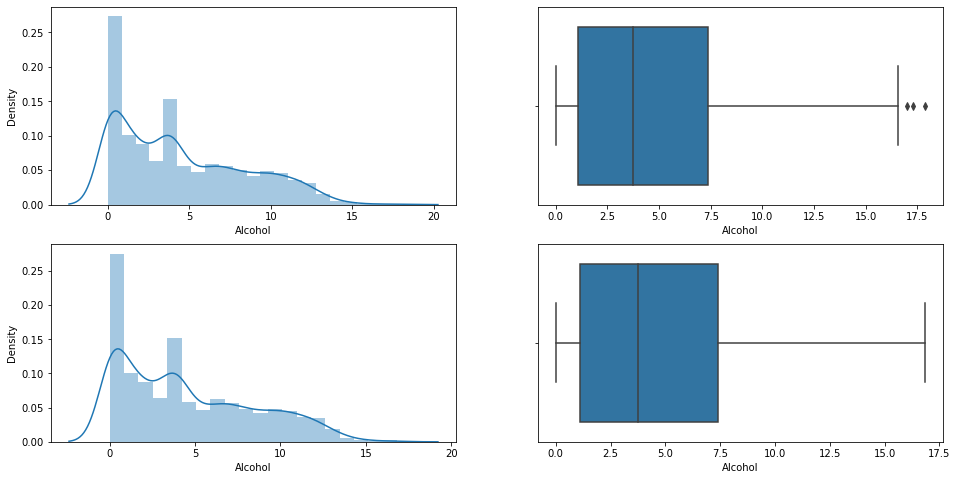

In [16]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

#'Alcohol
percentile25_Alcohol= df['Alcohol'].quantile(0.25)
percentile75_Alcohol = df['Alcohol'].quantile(0.75)
iqr_Alcohol=percentile75_Alcohol-percentile25_Alcohol
upper_limit_Alcohol = percentile75_Alcohol+ 1.5 * iqr_Alcohol
lower_limit_Alcohol = percentile25_Alcohol- 1.5 * iqr_Alcohol
df[df['Alcohol'] > upper_limit_Alcohol]
df[df['Alcohol'] < lower_limit_Alcohol]

#Trimming
new_df_Alcohol= df[df['Alcohol'] < upper_limit_Alcohol]
new_df_Alcohol.shape

#Capping
new_df_cap_Alcohol= df.copy()
new_df_cap_Alcohol['Alcohol'] = np.where(
    new_df_cap_Alcohol['Alcohol'] >upper_limit_Alcohol,
   upper_limit_Alcohol,
    np.where(
        new_df_cap_Alcohol['Alcohol'] < lower_limit_Alcohol,
       lower_limit_Alcohol,
        new_df_cap_Alcohol['Alcohol']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Alcohol'])
plt.subplot(2,2,2)
sns.boxplot(df['Alcohol'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_Alcohol['Alcohol'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_Alcohol['Alcohol'])
plt.show()


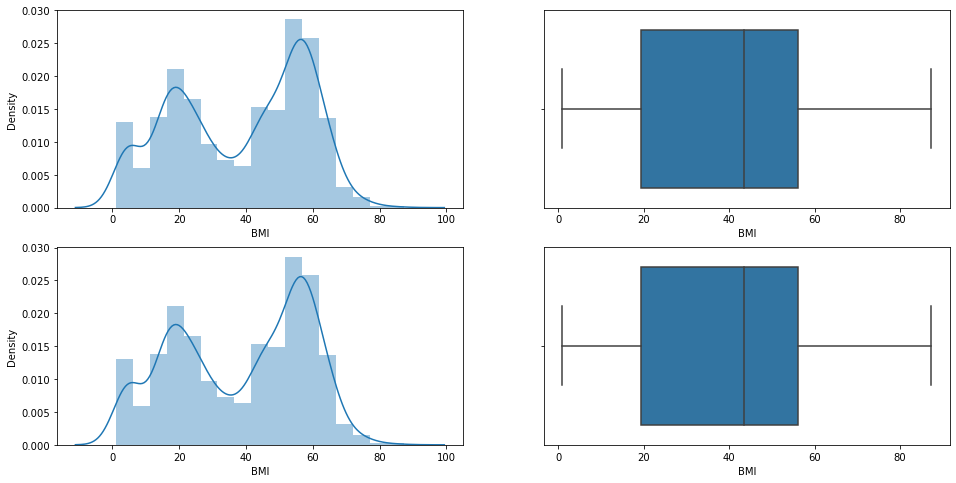

In [17]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
#'BMI'
percentile25_BMI = df['BMI'].quantile(0.25)
percentile75_BMI = df['BMI'].quantile(0.75)
iqr_BMI=percentile75_BMI-percentile25_BMI
upper_limit_BMI = percentile75_BMI + 1.5 * iqr_BMI
lower_limit_BMI = percentile25_BMI - 1.5 * iqr_BMI
df[df['BMI'] > upper_limit_BMI]
df[df['BMI'] < lower_limit_BMI]

#Trimming
new_df_BMI= df[df['BMI'] < upper_limit_BMI]
new_df_BMI.shape

#Capping
new_df_cap_BMI= df.copy()
new_df_cap_BMI['BMI'] = np.where(
    new_df_cap_BMI['BMI'] >upper_limit_BMI,
   upper_limit_BMI,
    np.where(
        new_df_cap_BMI['BMI'] < lower_limit_BMI,
       lower_limit_BMI,
        new_df_cap_BMI['BMI']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['BMI'])
plt.subplot(2,2,2)
sns.boxplot(df['BMI'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_BMI['BMI'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_BMI['BMI'])
plt.show()

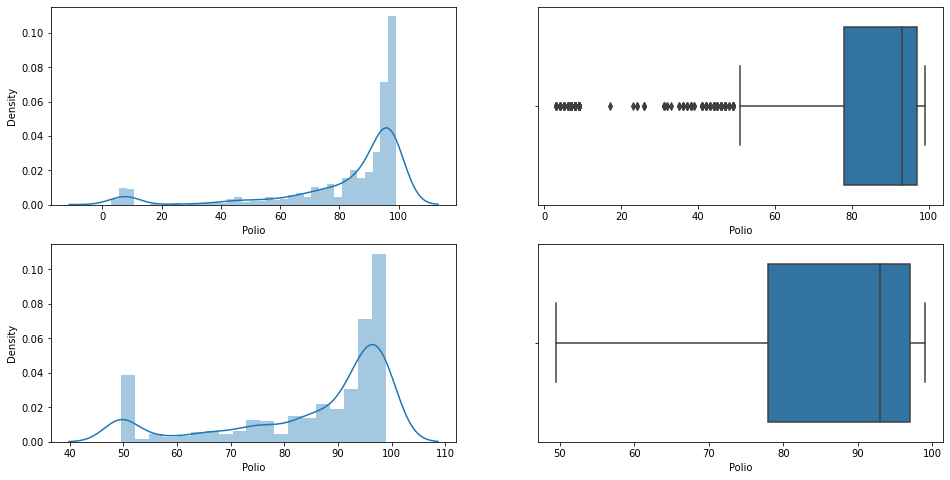

In [18]:
#'Polio'
percentile25_Polio = df['Polio'].quantile(0.25)
percentile75_Polio = df['Polio'].quantile(0.75)
iqr_Polio =percentile75_Polio -percentile25_Polio 
upper_limit_Polio  = percentile75_Polio  + 1.5 * iqr_Polio 
lower_limit_Polio  = percentile25_Polio  - 1.5 * iqr_Polio 
df[df['Polio'] > upper_limit_Polio ]
df[df['Polio'] < lower_limit_Polio ]

#Trimming
new_df_Polio= df[df['Polio'] < upper_limit_Polio]
new_df_Polio.shape

#Capping
new_df_cap_Polio= df.copy()
new_df_cap_Polio['Polio'] = np.where(
    new_df_cap_Polio['Polio'] >upper_limit_Polio ,
   upper_limit_Polio ,
    np.where(
        new_df_cap_Polio['Polio'] < lower_limit_Polio,
       lower_limit_Polio,
        new_df_cap_Polio['Polio']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Polio'])
plt.subplot(2,2,2)
sns.boxplot(df['Polio'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_Polio['Polio'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_Polio['Polio'])
plt.show()

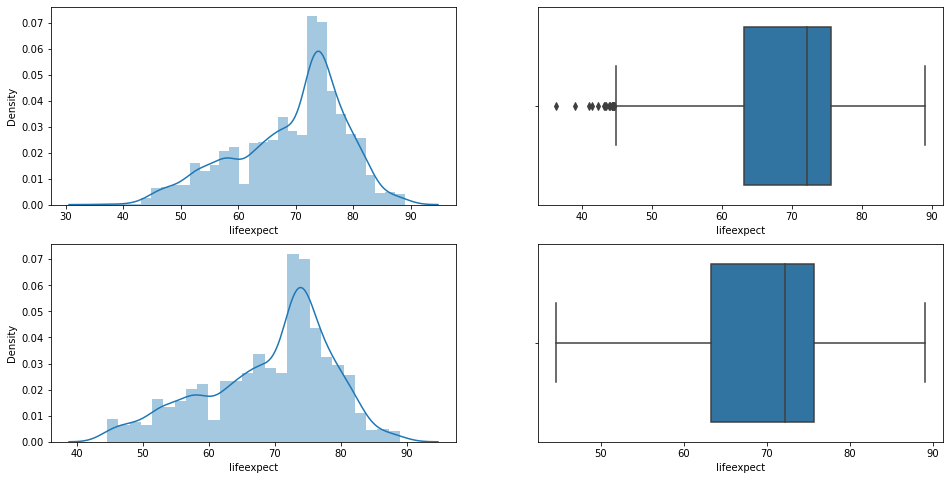

In [19]:
#'Lifeexpect'
percentile25_lifeexpect = df['lifeexpect'].quantile(0.25)
percentile75_lifeexpect = df['lifeexpect'].quantile(0.75)
iqr_lifeexpect =percentile75_lifeexpect -percentile25_lifeexpect
upper_limit_lifeexpect  = percentile75_lifeexpect  + 1.5 * iqr_lifeexpect 
lower_limit_lifeexpect  = percentile25_lifeexpect  - 1.5 * iqr_lifeexpect 
df[df['lifeexpect'] > upper_limit_lifeexpect ]
df[df['lifeexpect'] < lower_limit_lifeexpect ]

#Trimming
new_df_Polio= df[df['lifeexpect'] < upper_limit_lifeexpect]
new_df_Polio.shape

#Capping
new_df_cap_lifeexpect= df.copy()
new_df_cap_lifeexpect['lifeexpect'] = np.where(
    new_df_cap_lifeexpect['lifeexpect'] >upper_limit_lifeexpect ,
   upper_limit_lifeexpect ,
    np.where(
        new_df_cap_lifeexpect['lifeexpect'] < lower_limit_lifeexpect,
       lower_limit_lifeexpect,
        new_df_cap_lifeexpect['lifeexpect']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['lifeexpect'])
plt.subplot(2,2,2)
sns.boxplot(df['lifeexpect'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_lifeexpect['lifeexpect'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_lifeexpect['lifeexpect'])
plt.show()

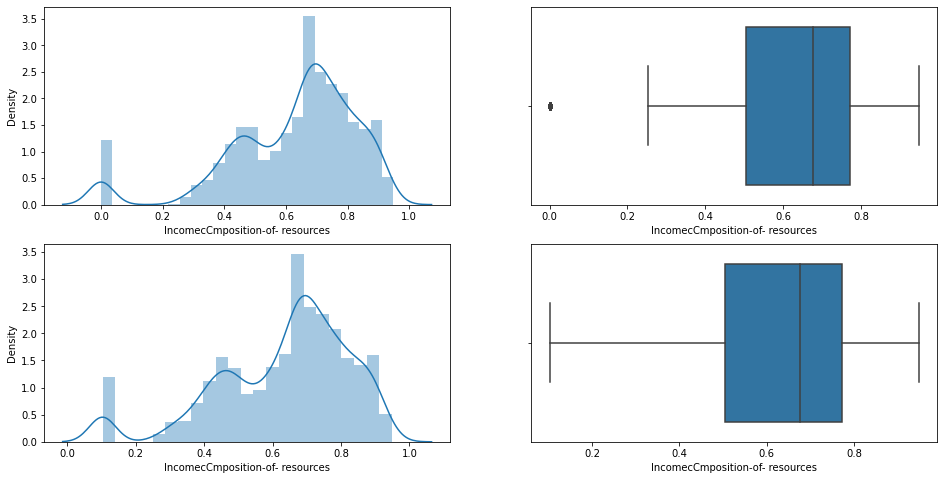

In [23]:
#'IncomecCmposition-of- resources'
percentile25_Income = df['IncomecCmposition-of- resources'].quantile(0.25)
percentile75_Income = df['IncomecCmposition-of- resources'].quantile(0.75)
iqr_Income =percentile75_Income-percentile25_Income
upper_limit_Income = percentile75_Income  + 1.5 * iqr_Income
lower_limit_Income = percentile25_Income - 1.5 * iqr_Income
df[df['IncomecCmposition-of- resources'] > upper_limit_Income]
df[df['IncomecCmposition-of- resources'] < lower_limit_Income ]

#Trimming
new_df_Income= df[df['IncomecCmposition-of- resources'] < upper_limit_Income]
new_df_Income.shape

#Capping
new_df_cap_Income= df.copy()
new_df_cap_Income['IncomecCmposition-of- resources'] = np.where(
    new_df_cap_Income['IncomecCmposition-of- resources'] >upper_limit_Income ,
   upper_limit_Income,
    np.where(
        new_df_cap_Income['IncomecCmposition-of- resources'] < lower_limit_Income,
       lower_limit_Income,
        new_df_cap_Income['IncomecCmposition-of- resources']
    )
)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['IncomecCmposition-of- resources'])
plt.subplot(2,2,2)
sns.boxplot(df['IncomecCmposition-of- resources'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap_Income['IncomecCmposition-of- resources'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap_Income['IncomecCmposition-of- resources'])
plt.show()

In [34]:
#to give the new values of df new columns to the old columns
df['Polio']=new_df_cap_Polio['Polio']
df['lifeexpect']=new_df_cap_lifeexpect['lifeexpect']
df['BMI']=new_df_cap_BMI['BMI']
df['Schooling']= new_df_cap_Schooling['Schooling']
df['Alcohol']=new_df_cap_Alcohol['Alcohol']
df['percentageExpenditure']=new_df_cap_percentageExpenditure['percentageExpenditure']
df['HepatitisB']=new_df_cap_Hepatitis['HepatitisB']
df['Totalexpenditure']=new_df_cap_Expenditure['Totalexpenditure']
df['IncomecComposition-of- resources']=new_df_cap_Income['IncomecCmposition-of- resources']
df['Diphtheria']=new_df_cap_Dip['Diphtheria']
df['GDP']= new_df_cap_GDP['GDP']

In [35]:
df.describe()

,Year,Status,lifeexpect,AdultMortality,infantdeaths,Alcohol,percentageExpenditure,HepatitisB,Measles,BMI,...,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness(1-19 years),thinness(5-9 years),IncomecCmposition-of- resources,Schooling,IncomecComposition-of- resources
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.244588,164.725664,30.303948,4.546310,171.423602,87.008850,2419.592240,38.381178,...,5.904816,85.301906,1.742103,3443.019953,1.023085e+07,4.821886,4.852144,0.630362,12.060824,0.634903
std,4.613841,0.379405,9.481081,124.086215,117.926501,3.920116,188.683985,12.308952,11467.272489,19.935375,...,2.329849,15.790731,5.077785,3777.901722,5.402242e+07,4.397621,4.485854,0.205140,3.101263,0.191836
min,2000.000000,0.000000,44.600000,1.000000,0.000000,0.010000,0.000000,61.000000,0.000000,1.000000,...,0.370000,49.500000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.600000,0.102625
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,...,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.504250
50%,2008.000000,0.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,0.677000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,...,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000,0.772000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,16.836250,455.656130,99.000000,212183.000000,87.300000,...,13.030000,99.000000,50.600000,11077.782482,1.293859e+09,27.700000,28.600000,0.948000,19.800000,0.948000


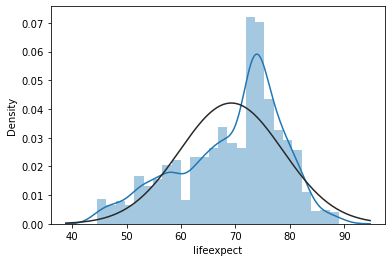

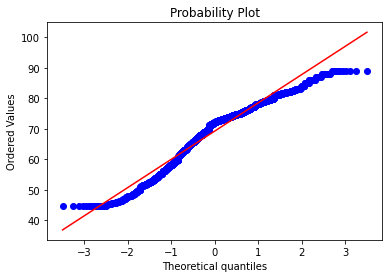

In [36]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['lifeexpect'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['lifeexpect'], plot=plt)

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

In [38]:
#https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#h2_1
# https://colab.research.google.com/drive/1crT7PUQHjI4zN4NZAN0Zzg9W3aeRmrvZ#scrollTo=GLJeS3EmUrNN


y = df['lifeexpect']
y.head()
X=df.drop(columns=['Country','lifeexpect','AdultMortality','infantdeaths','Measles','under-five deaths','HIV/AIDS','Population','thinness(1-19 years)','thinness(5-9 years)'],axis=1)
X.head()

,Year,Status,Alcohol,percentageExpenditure,HepatitisB,BMI,Polio,Totalexpenditure,Diphtheria,GDP,IncomecCmposition-of- resources,Schooling,IncomecComposition-of- resources
0,2015,0,0.01,71.279624,65.0,19.1,49.5,8.16,65.0,584.259210,0.479,10.1,0.479
1,2014,0,0.01,73.523582,62.0,18.6,58.0,8.18,62.0,612.696514,0.476,10.0,0.476
2,2013,0,0.01,73.219243,64.0,18.1,62.0,8.13,64.0,631.744976,0.470,9.9,0.470
3,2012,0,0.01,78.184215,67.0,17.6,67.0,8.52,67.0,669.959000,0.463,9.8,0.463
4,2011,0,0.01,7.097109,68.0,17.2,68.0,7.87,68.0,63.537231,0.454,9.5,0.454


In [39]:
y = df['lifeexpect']
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: lifeexpect, dtype: float64

In [42]:
y = df['lifeexpect']
y.head()
#print ("\nOriginal data values : \n",  X)
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2938, 13)
(2938,)


In [43]:


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=12345)

# Normalizing numerical features so that each feature has mean 0 and variance 1
Standardisation = StandardScaler()

x_after_Standardisation = Standardisation.fit_transform(X)

print ("\nAfter Standardisation : \n", x_after_Standardisation)




After Standardisation : 
 [[ 1.6217623  -0.45939851 -1.15738476 ... -0.73797341 -0.63237372
  -0.81282654]
 [ 1.40498625 -0.45939851 -1.15738476 ... -0.75260009 -0.66462413
  -0.82846757]
 [ 1.1882102  -0.45939851 -1.15738476 ... -0.78185344 -0.69687454
  -0.85974963]
 ...
 [-1.19632639 -0.45939851 -0.02967509 ... -0.99150247 -0.66462413
  -1.08393775]
 [-1.41310244 -0.45939851 -0.72109889 ... -0.99150247 -0.72912495
  -1.08393775]
 [-1.62987849 -0.45939851 -0.73130441 ... -0.95737356 -0.72912495
  -1.04744201]]


In [44]:
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

regressor = LinearRegression()
regressor.fit(X_train, y_train)
  
# predicting the test set results
y_pred = regressor.predict(X_test)

In [45]:
cof=regressor.coef_
pd.DataFrame(cof, X.columns, columns=['coef'])

,coef
Year,0.068364
Status,2.438380
Alcohol,-0.201297
percentageExpenditure,0.002634
HepatitisB,-0.057099
BMI,0.046366
Polio,0.048439
Totalexpenditure,0.123268
Diphtheria,0.087427
GDP,-0.000132


In [46]:
# Linear Regression
# Tuning the SGDRegressor parameters 'eta0' (learning rate) and 'max_iter' using Grid Search

from sklearn.model_selection import GridSearchCV

sgdr = SGDRegressor(random_state = 1, penalty = None)
grid_param = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}

gd_sr = GridSearchCV(estimator=sgdr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(x_after_Standardisation, y)

results = pd.DataFrame.from_dict(gd_sr.cv_results_)
print("Cross-validation results:\n", results)

best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best result: ", best_result)

best_model = gd_sr.best_estimator_
print("Intercept: ", best_model.intercept_)

print(pd.DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))



Cross-validation results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta0  \
0        0.134235      0.019823         0.000197        0.000394     0.0001   
1        0.126628      0.010189         0.000799        0.000399     0.0001   
2        0.154861      0.020118         0.000397        0.000487     0.0001   
3        0.143827      0.016318         0.000803        0.000402     0.0001   
4        0.025400      0.003607         0.000801        0.000401      0.001   
5        0.023611      0.004076         0.000595        0.000485      0.001   
6        0.024599      0.003070         0.000404        0.000495      0.001   
7        0.023384      0.003861         0.000396        0.000486      0.001   
8        0.043612      0.012665         0.000600        0.000490       0.01   
9        0.043806      0.010719         0.000802        0.000401       0.01   
10       0.036407      0.012023         0.000802        0.000401       0.01   
11       0.041413      0.

In [39]:
# Implementing Regularization
# Tuning the SGDRegressor parameters 'eta0' (learning rate) and 'max_iter', along with the regularization parameter alpha using Grid Search

sgdr = SGDRegressor(random_state = 1, penalty = 'elasticnet', eta0=.01, max_iter=10000)

grid_param = {'alpha': [.0001, .001, .01, .1, 1], 'l1_ratio': [0,0.25,0.5,0.75,1]}

gd_sr = GridSearchCV(estimator=sgdr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(x_after_Standardisation, y)

results = pd.DataFrame.from_dict(gd_sr.cv_results_)
print("Cross-validation results:\n", results)

best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best result: ", best_result)

best_model = gd_sr.best_estimator_
print("Intercept: ", best_model.intercept_)

print(pd.DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))


Cross-validation results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.041209      0.008415         0.000388        0.000475      0.0001   
1        0.041840      0.008312         0.000616        0.000504      0.0001   
2        0.042587      0.010976         0.000206        0.000412      0.0001   
3        0.043304      0.011340         0.000795        0.000398      0.0001   
4        0.043604      0.009880         0.000598        0.000488      0.0001   
5        0.027526      0.006392         0.000808        0.000405       0.001   
6        0.029053      0.007190         0.000400        0.000490       0.001   
7        0.028419      0.006757         0.000416        0.000510       0.001   
8        0.035830      0.012999         0.000614        0.000502       0.001   
9        0.038417      0.013845         0.000628        0.000513       0.001   
10       0.015004      0.004731         0.000117        0.000145        0.01   
11       0.01

In [47]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(random_state = 6, penalty = None)
sgradient = sgdr.fit(x_after_Standardisation,y)
sgdr_score = gd_sr.best_score_
sgdr_score

0.7006003299630341

In [48]:
regressor.score(X_test,y_test)

0.7377737830759444

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1747,73.0,68.815082
193,71.4,66.433862
2088,82.0,71.786261
1057,74.0,64.975176
799,73.6,70.682200
...,...,...
1613,73.4,67.985172
1558,63.8,61.582594
510,79.4,77.455590
663,78.1,76.573932


In [50]:
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
# https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c
from sklearn import metrics
print('R squared: {:.2f}'.format(regressor.score(X,y)*100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R squared: 73.73
Mean Absolute Error: 3.5328767475652074
Mean Squared Error: 23.024316817252956
Root Mean Squared Error: 4.798366057029513
